### Load in time series objects of the Twitter, Google search, and FBI Hate-Crime datasets

Granger causality is based on the idea that if a variable X can be used to predict another variable Y better than Y can be predicted by its own past values, then X is said to Granger-cause Y. However, this does not necessarily mean that X causes Y in the sense of a direct causal relationship. 

In [51]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt


In [2]:
twitter_m_df = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/ts_month_tweet.csv', index_col=0, parse_dates=True)
twitter_d_df = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/ts_day_tweet.csv', index_col=0, parse_dates=True)
google_d_old = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/ts_d_google_old.csv', index_col=0, parse_dates=True)
google_d_new = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/ts_d_google_new.csv', index_col=0, parse_dates=True)
google_m_old = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/ts_m_google_old.csv', index_col=0, parse_dates=True)
google_m_new = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/ts_m_google_new.csv', index_col=0, parse_dates=True)
crime_a_diff = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/FBI_hatecrime/crime_a_ts_diff.csv', index_col=0, parse_dates=True)
crime_diff = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/FBI_hatecrime/crime_ts_diff.csv', index_col=0, parse_dates=True)

In [3]:
def granger_table(res, lag_val):
    ''' 
    Helper function to write out and organize p-values for different tests on different lag values
    Input: The result for Granger Causality test from the previous step
    '''
    table = pd.DataFrame(columns=['Maxlags', 'ssr F p-value', 'ssr chi2 p-value', 
                                 'likelihoodratio p-value', 'param F p-value'])

    for lag in range(1, lag_val+1):
        test_results = res[lag][0]
        table = table.append({'Maxlags': lag, 
                                        'ssr F p-value': round(test_results['ssr_ftest'][1], 3),
                                        'ssr chi2 p-value': round(test_results['ssr_chi2test'][1], 3),
                                        'likelihoodratio p-value': round(test_results['lrtest'][1], 3),
                                        'param F p-value': round(test_results['params_ftest'][1], 3)},
                                        ignore_index=True)
    return table

## Granger Causality for daily Twitter and Google Search Time Series

In [4]:
# First difference daily Google Search time series to match daily Twitter time series
google_d_old_df = google_d_old.diff().dropna()
google_d_new_df = google_d_new.diff().dropna()

In [5]:
google_d_old_df

,0
2020-01-02,1.0
2020-01-03,-18.0
2020-01-04,0.0
2020-01-05,-6.0
2020-01-06,10.0
...,...
2020-12-27,-19.0
2020-12-28,27.0
2020-12-29,21.0
2020-12-30,-16.0


Test whether twitter_d_df Granger causes google_d_old_df, i.e., whether daily Twitter trend can predict (Granger Cause) daily Google search trend

In [6]:
tg_res1 = grangercausalitytests(np.column_stack((twitter_d_df, google_d_old_df)), maxlag=30)
tg_res1


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0801  , p=0.7773  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=0.0807  , p=0.7763  , df=1
likelihood ratio test: chi2=0.0807  , p=0.7763  , df=1
parameter F test:         F=0.0801  , p=0.7773  , df_denom=361, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7190  , p=0.4879  , df_denom=358, df_num=2
ssr based chi2 test:   chi2=1.4581  , p=0.4824  , df=2
likelihood ratio test: chi2=1.4551  , p=0.4831  , df=2
parameter F test:         F=0.7190  , p=0.4879  , df_denom=358, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2032  , p=0.3085  , df_denom=355, df_num=3
ssr based chi2 test:   chi2=3.6807  , p=0.2981  , df=3
likelihood ratio test: chi2=3.6622  , p=0.3003  , df=3
parameter F test:         F=1.2032  , p=0.3085  , df_denom=355, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7831  , p=0.5367  

{1: ({'ssr_ftest': (0.08008291243441992, 0.7773472814931969, 361.0, 1),
   'ssr_chi2test': (0.08074842140201897, 0.7762857239331737, 1),
   'lrtest': (0.08073946625972894, 0.7762977991309631, 1),
   'params_ftest': (0.08008291243422452, 0.7773472814934139, 361.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.7189893185691056, 0.48794665559057704, 358.0, 2),
   'ssr_chi2test': (1.4580621376569016, 0.4823761530203644, 2),
   'lrtest': (1.455141656339947, 0.4830810528281094, 2),
   'params_ftest': (0.7189893185690943, 0.48794665559057704, 358.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.203189443639137, 0.30847426248363147, 355.0, 3),
   'ssr_chi2test': (3.6807429177242335, 0.2980657838387976, 3),
   'lrtest': (3.6621562762411486, 0.3003319159157183, 3),
   'params_ftest': (1.2031894436391168, 0.3084742624836439, 355.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

In [7]:
tg_table = granger_table(tg_res1, 30) 
tg_table

/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.appe

,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.777,0.776,0.776,0.777
1,2.0,0.488,0.482,0.483,0.488
2,3.0,0.308,0.298,0.3,0.308
3,4.0,0.537,0.523,0.525,0.537
4,5.0,0.761,0.749,0.751,0.761
5,6.0,0.673,0.653,0.656,0.673
6,7.0,0.687,0.661,0.666,0.687
7,8.0,0.769,0.744,0.748,0.769
8,9.0,0.321,0.275,0.287,0.321
9,10.0,0.385,0.33,0.343,0.385


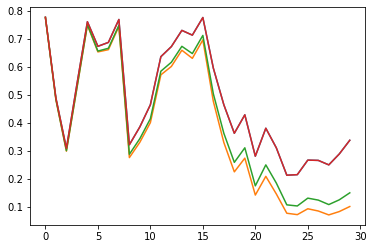

In [52]:
plt.plot(tg_table.index, tg_table['ssr F p-value'])
plt.plot(tg_table.index, tg_table['ssr chi2 p-value'])
plt.plot(tg_table.index, tg_table['likelihoodratio p-value'])
plt.plot(tg_table.index, tg_table['param F p-value'])

- Conclusion: twitter_d_df doesn't Granger-cause  google_d_old_df

In [8]:
tg_res2 = grangercausalitytests(np.column_stack((twitter_d_df, google_d_new_df)), maxlag=30)
tg_table2 = granger_table(tg_res2, 30) 
tg_table2


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0092  , p=0.9238  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=0.0092  , p=0.9235  , df=1
likelihood ratio test: chi2=0.0092  , p=0.9235  , df=1
parameter F test:         F=0.0092  , p=0.9238  , df_denom=361, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1291  , p=0.8790  , df_denom=358, df_num=2
ssr based chi2 test:   chi2=0.2617  , p=0.8773  , df=2
likelihood ratio test: chi2=0.2616  , p=0.8774  , df=2
parameter F test:         F=0.1291  , p=0.8790  , df_denom=358, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4741  , p=0.7005  , df_denom=355, df_num=3
ssr based chi2 test:   chi2=1.4502  , p=0.6938  , df=3
likelihood ratio test: chi2=1.4473  , p=0.6945  , df=3
parameter F test:         F=0.4741  , p=0.7005  , df_denom=355, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5438  , p=0.7037  

/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.appe

,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.924,0.923,0.923,0.924
1,2.0,0.879,0.877,0.877,0.879
2,3.0,0.701,0.694,0.694,0.701
3,4.0,0.704,0.693,0.695,0.704
4,5.0,0.846,0.837,0.838,0.846
5,6.0,0.92,0.914,0.915,0.92
6,7.0,0.804,0.786,0.789,0.804
7,8.0,0.865,0.848,0.851,0.865
8,9.0,0.917,0.904,0.906,0.917
9,10.0,0.943,0.932,0.933,0.943


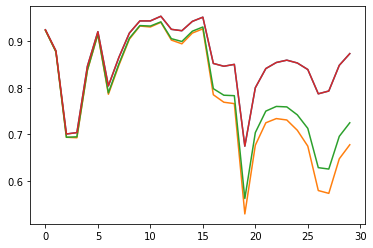

In [53]:
plt.plot(tg_table2.index, tg_table2['ssr F p-value'])
plt.plot(tg_table2.index, tg_table2['ssr chi2 p-value'])
plt.plot(tg_table2.index, tg_table2['likelihoodratio p-value'])
plt.plot(tg_table2.index, tg_table2['param F p-value'])

- Conclusion: twitter_d_df doesn't Granger-cause google_d_new_df

In [9]:
gt_res1 = grangercausalitytests(np.column_stack((google_d_old_df, twitter_d_df)), maxlag=30)
gt_table1 = granger_table(gt_res1, 30) 
gt_table1


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6776  , p=0.1026  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=2.6998  , p=0.1004  , df=1
likelihood ratio test: chi2=2.6898  , p=0.1010  , df=1
parameter F test:         F=2.6776  , p=0.1026  , df_denom=361, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.2192  , p=0.0411  , df_denom=358, df_num=2
ssr based chi2 test:   chi2=6.5284  , p=0.0382  , df=2
likelihood ratio test: chi2=6.4704  , p=0.0394  , df=2
parameter F test:         F=3.2192  , p=0.0411  , df_denom=358, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5287  , p=0.0571  , df_denom=355, df_num=3
ssr based chi2 test:   chi2=7.7357  , p=0.0518  , df=3
likelihood ratio test: chi2=7.6542  , p=0.0537  , df=3
parameter F test:         F=2.5287  , p=0.0571  , df_denom=355, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0214  , p=0.0910  

/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.appe

,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.103,0.1,0.101,0.103
1,2.0,0.041,0.038,0.039,0.041
2,3.0,0.057,0.052,0.054,0.057
3,4.0,0.091,0.081,0.085,0.091
4,5.0,0.041,0.034,0.036,0.041
5,6.0,0.075,0.061,0.066,0.075
6,7.0,0.081,0.064,0.069,0.081
7,8.0,0.106,0.083,0.09,0.106
8,9.0,0.133,0.102,0.111,0.133
9,10.0,0.175,0.134,0.145,0.175


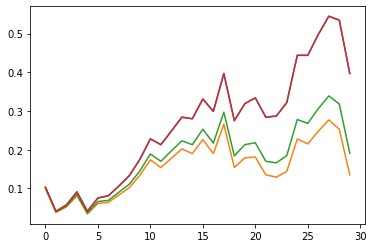

In [54]:
plt.plot(gt_table1.index, gt_table1['ssr F p-value'])
plt.plot(gt_table1.index, gt_table1['ssr chi2 p-value'])
plt.plot(gt_table1.index, gt_table1['likelihoodratio p-value'])
plt.plot(gt_table1.index, gt_table1['param F p-value'])

- Conclusion: Observe from the above Granger Causality Result Table, we see the p-values are significant at lag=2 and lag=5, which suggests the possibility of a causal relationship between the two variables being tested.

In [10]:
gt_res2 = grangercausalitytests(np.column_stack((google_d_new_df, twitter_d_df)), maxlag=30)
gt_table2 = granger_table(gt_res2, 30) 
gt_table2


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6974  , p=0.1935  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=1.7115  , p=0.1908  , df=1
likelihood ratio test: chi2=1.7075  , p=0.1913  , df=1
parameter F test:         F=1.6974  , p=0.1935  , df_denom=361, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1637  , p=0.3135  , df_denom=358, df_num=2
ssr based chi2 test:   chi2=2.3598  , p=0.3073  , df=2
likelihood ratio test: chi2=2.3522  , p=0.3085  , df=2
parameter F test:         F=1.1637  , p=0.3135  , df_denom=358, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8726  , p=0.4554  , df_denom=355, df_num=3
ssr based chi2 test:   chi2=2.6695  , p=0.4454  , df=3
likelihood ratio test: chi2=2.6597  , p=0.4471  , df=3
parameter F test:         F=0.8726  , p=0.4554  , df_denom=355, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6095  , p=0.6560  

/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.appe

,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.193,0.191,0.191,0.193
1,2.0,0.314,0.307,0.308,0.314
2,3.0,0.455,0.445,0.447,0.455
3,4.0,0.656,0.645,0.646,0.656
4,5.0,0.616,0.598,0.601,0.616
5,6.0,0.721,0.703,0.706,0.721
6,7.0,0.754,0.733,0.736,0.754
7,8.0,0.678,0.646,0.652,0.678
8,9.0,0.57,0.525,0.535,0.57
9,10.0,0.643,0.595,0.605,0.643


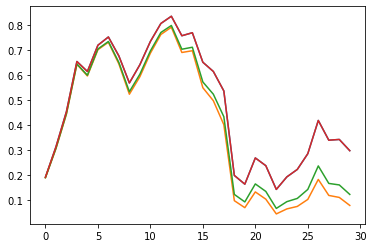

In [55]:
plt.plot(gt_table2.index, gt_table2['ssr F p-value'])
plt.plot(gt_table2.index, gt_table2['ssr chi2 p-value'])
plt.plot(gt_table2.index, gt_table2['likelihoodratio p-value'])
plt.plot(gt_table2.index, gt_table2['param F p-value'])

- Conclusion: google_d_new_df doesn't Granger-cause twitter_d_df

## Granger Causality for Monthly Twitter and Google Search Time Series

In [11]:
google_m_old_df = google_m_old.diff().dropna()
google_m_new_df = google_m_new.diff().dropna()

In [12]:
tgm_res1 = grangercausalitytests(np.column_stack((twitter_m_df, google_m_old_df)), maxlag=3)
tgm_table1 = granger_table(tgm_res1, 3)
tgm_table1


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6530  , p=0.1474  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=3.7900  , p=0.0516  , df=1
likelihood ratio test: chi2=3.2136  , p=0.0730  , df=1
parameter F test:         F=2.6530  , p=0.1474  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3707  , p=0.7117  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=1.6682  , p=0.4343  , df=2
likelihood ratio test: chi2=1.5304  , p=0.4652  , df=2
parameter F test:         F=0.3707  , p=0.7117  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1334  , p=0.5831  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=27.2018 , p=0.0000  , df=3
likelihood ratio test: chi2=11.8533 , p=0.0079  , df=3
parameter F test:         F=1.1334  , p=0.5831  , df_denom=1, df_num=3


/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,


,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.147,0.052,0.073,0.147
1,2.0,0.712,0.434,0.465,0.712
2,3.0,0.583,0.0,0.008,0.583


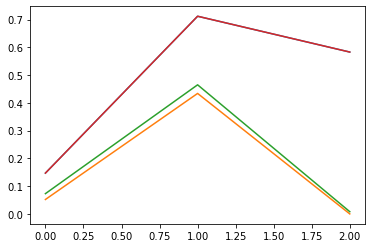

In [56]:
plt.plot(tgm_table1.index, tgm_table1['ssr F p-value'])
plt.plot(tgm_table1.index, tgm_table1['ssr chi2 p-value'])
plt.plot(tgm_table1.index, tgm_table1['likelihoodratio p-value'])
plt.plot(tgm_table1.index, tgm_table1['param F p-value'])

- Conclusion: At lag=3, we see significant p-value for SSR Chi2 Test and Likelihood Ratio Test. This indicates that Granger causality may exist between the two time series at a lag of 3 based on the likelihood ratio test and SSR based Chi2 test, i.e., Monthly Google Search Trend based on the old set of keywords may Granger-cause Monthly Tweitter Trend

In [13]:
tgm_res2 = grangercausalitytests(np.column_stack((twitter_m_df, google_m_new_df)), maxlag=3)
tgm_table2 = granger_table(tgm_res2, 3)
tgm_table2


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2116  , p=0.3074  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=1.7308  , p=0.1883  , df=1
likelihood ratio test: chi2=1.5964  , p=0.2064  , df=1
parameter F test:         F=1.2116  , p=0.3074  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0499  , p=0.4300  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=4.7247  , p=0.0942  , df=2
likelihood ratio test: chi2=3.7978  , p=0.1497  , df=2
parameter F test:         F=1.0499  , p=0.4300  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.0094  , p=0.2893  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=144.2253, p=0.0000  , df=3
likelihood ratio test: chi2=23.5674 , p=0.0000  , df=3
parameter F test:         F=6.0094  , p=0.2893  , df_denom=1, df_num=3


/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,


,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.307,0.188,0.206,0.307
1,2.0,0.43,0.094,0.15,0.43
2,3.0,0.289,0.0,0.0,0.289


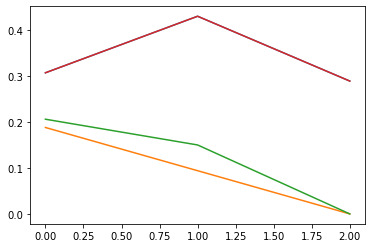

In [57]:
plt.plot(tgm_table2.index, tgm_table2['ssr F p-value'])
plt.plot(tgm_table2.index, tgm_table2['ssr chi2 p-value'])
plt.plot(tgm_table2.index, tgm_table2['likelihoodratio p-value'])
plt.plot(tgm_table2.index, tgm_table2['param F p-value'])

- Conclusion: Similarly at lag=3, we see significant p-value for SSR Chi2 Test and Likelihood Ratio Test. This indicates that Granger causality may exist between the two time series at a lag of 3 based on the likelihood ratio test and SSR based Chi2 test, i.e., Monthly Google Search Trend based on the new set of search words may Granger-cause Monthly Twitter Trend

In [14]:
gtm_res1 = grangercausalitytests(np.column_stack((google_m_old_df, twitter_m_df)), maxlag=3)
gtm_table1 = granger_table(gtm_res1, 3)
gtm_table1


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0066  , p=0.9377  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=0.0094  , p=0.9229  , df=1
likelihood ratio test: chi2=0.0094  , p=0.9229  , df=1
parameter F test:         F=0.0066  , p=0.9377  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1676  , p=0.8513  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=0.7543  , p=0.6858  , df=2
likelihood ratio test: chi2=0.7243  , p=0.6962  , df=2
parameter F test:         F=0.1676  , p=0.8513  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3237  , p=0.8229  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=7.7700  , p=0.0510  , df=3
likelihood ratio test: chi2=5.4293  , p=0.1429  , df=3
parameter F test:         F=0.3237  , p=0.8229  , df_denom=1, df_num=3


/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,


,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.938,0.923,0.923,0.938
1,2.0,0.851,0.686,0.696,0.851
2,3.0,0.823,0.051,0.143,0.823


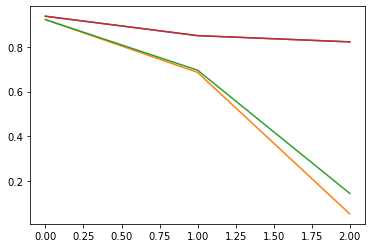

In [58]:
plt.plot(gtm_table1.index, gtm_table1['ssr F p-value'])
plt.plot(gtm_table1.index, gtm_table1['ssr chi2 p-value'])
plt.plot(gtm_table1.index, gtm_table1['likelihoodratio p-value'])
plt.plot(gtm_table1.index, gtm_table1['param F p-value'])

- Conclusion: There doesn't seem to be clear Granger Causality

In [15]:
gtm_res2 = grangercausalitytests(np.column_stack((google_m_new_df, twitter_m_df)), maxlag=3)
gtm_table2 = granger_table(gtm_res2, 3)
gtm_table2


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2302  , p=0.6460  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=0.3289  , p=0.5663  , df=1
likelihood ratio test: chi2=0.3236  , p=0.5695  , df=1
parameter F test:         F=0.2302  , p=0.6460  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1097  , p=0.8987  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=0.4938  , p=0.7812  , df=2
likelihood ratio test: chi2=0.4807  , p=0.7863  , df=2
parameter F test:         F=0.1097  , p=0.8987  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9525  , p=0.3986  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=70.8592 , p=0.0000  , df=3
likelihood ratio test: chi2=18.3058 , p=0.0004  , df=3
parameter F test:         F=2.9525  , p=0.3986  , df_denom=1, df_num=3


/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,


,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.646,0.566,0.569,0.646
1,2.0,0.899,0.781,0.786,0.899
2,3.0,0.399,0.0,0.0,0.399


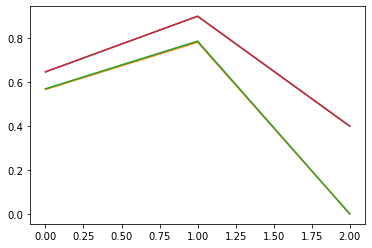

In [59]:
plt.plot(gtm_table2.index, gtm_table2['ssr F p-value'])
plt.plot(gtm_table2.index, gtm_table2['ssr chi2 p-value'])
plt.plot(gtm_table2.index, gtm_table2['likelihoodratio p-value'])
plt.plot(gtm_table2.index, gtm_table2['param F p-value'])

- Conclusion: The p-values for ssr based chi2 and likelihood ratio tests are significant, which indicates that the Google search trend based on new search words may Granger cause Sinophobic Twitter trend at lag 3 based on ssr chi2 test and likelihood ratio test

## Granger Causality for Monthly Twitter and Anti-Asian Hate Crimes Time Series

In [16]:
tc_res1 = grangercausalitytests(np.column_stack((twitter_m_df, crime_a_diff)), maxlag=3)
tc_table1 = granger_table(tc_res1, 3)
tc_table1


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0630  , p=0.3368  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=1.5186  , p=0.2178  , df=1
likelihood ratio test: chi2=1.4138  , p=0.2344  , df=1
parameter F test:         F=1.0630  , p=0.3368  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0036  , p=0.4434  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=4.5162  , p=0.1045  , df=2
likelihood ratio test: chi2=3.6600  , p=0.1604  , df=2
parameter F test:         F=1.0036  , p=0.4434  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=37.5402 , p=0.1193  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=900.9645, p=0.0000  , df=3
likelihood ratio test: chi2=37.8629 , p=0.0000  , df=3
parameter F test:         F=37.5402 , p=0.1193  , df_denom=1, df_num=3


/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,


,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.337,0.218,0.234,0.337
1,2.0,0.443,0.105,0.16,0.443
2,3.0,0.119,0.0,0.0,0.119


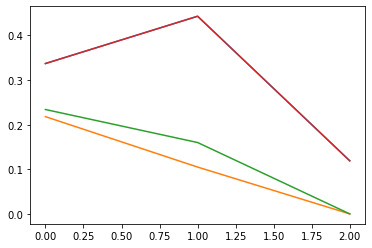

In [60]:
plt.plot(tc_table1.index, tc_table1['ssr F p-value'])
plt.plot(tc_table1.index, tc_table1['ssr chi2 p-value'])
plt.plot(tc_table1.index, tc_table1['likelihoodratio p-value'])
plt.plot(tc_table1.index, tc_table1['param F p-value'])

- Conclusion: The p-values for ssr based chi2 and likelihood ratio tests are significant, which indicates that the Sinophobic Twitter trend based may Granger cause Anti-Asian hate crimes at lag 3 based on ssr chi2 test and likelihood ratio test

In [17]:
tc_res2 = grangercausalitytests(np.column_stack((twitter_m_df, crime_diff)), maxlag=3)
tc_table2 = granger_table(tc_res2, 3)
tc_table2


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1389  , p=0.7204  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=0.1984  , p=0.6560  , df=1
likelihood ratio test: chi2=0.1964  , p=0.6576  , df=1
parameter F test:         F=0.1389  , p=0.7204  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9473  , p=0.2567  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=8.7628  , p=0.0125  , df=2
likelihood ratio test: chi2=6.1189  , p=0.0469  , df=2
parameter F test:         F=1.9473  , p=0.2567  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1876  , p=0.5735  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=28.5034 , p=0.0000  , df=3
likelihood ratio test: chi2=12.1437 , p=0.0069  , df=3
parameter F test:         F=1.1876  , p=0.5735  , df_denom=1, df_num=3


/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,


,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.72,0.656,0.658,0.72
1,2.0,0.257,0.013,0.047,0.257
2,3.0,0.574,0.0,0.007,0.574


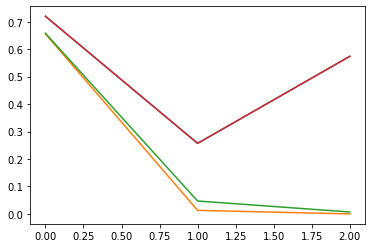

In [61]:
plt.plot(tc_table2.index, tc_table2['ssr F p-value'])
plt.plot(tc_table2.index, tc_table2['ssr chi2 p-value'])
plt.plot(tc_table2.index, tc_table2['likelihoodratio p-value'])
plt.plot(tc_table2.index, tc_table2['param F p-value'])

- Conclusion: We see that the p-values of ssr based chi2 test and likelihood ratio test are both significant at lag=2 and lag=3. This means that Sinophobic Twitter Post Trends Granger-causes the racial crimes based on these two tests.

In [18]:
ct_res1 = grangercausalitytests(np.column_stack((crime_a_diff, twitter_m_df)), maxlag=3)
ct_table1 = granger_table(ct_res1, 3)
ct_table1


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6488  , p=0.0977  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=5.2125  , p=0.0224  , df=1
likelihood ratio test: chi2=4.1953  , p=0.0405  , df=1
parameter F test:         F=3.6488  , p=0.0977  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1750  , p=0.3968  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=5.2874  , p=0.0711  , df=2
likelihood ratio test: chi2=4.1594  , p=0.1250  , df=2
parameter F test:         F=1.1750  , p=0.3968  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7551  , p=0.6668  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=18.1229 , p=0.0004  , df=3
likelihood ratio test: chi2=9.4670  , p=0.0237  , df=3
parameter F test:         F=0.7551  , p=0.6668  , df_denom=1, df_num=3


/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,


,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.098,0.022,0.041,0.098
1,2.0,0.397,0.071,0.125,0.397
2,3.0,0.667,0.0,0.024,0.667


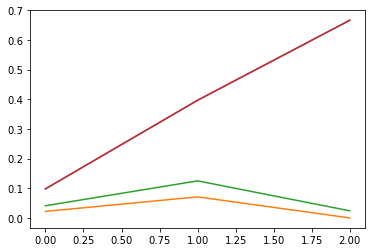

In [62]:
plt.plot(ct_table1.index, ct_table1['ssr F p-value'])
plt.plot(ct_table1.index, ct_table1['ssr chi2 p-value'])
plt.plot(ct_table1.index, ct_table1['likelihoodratio p-value'])
plt.plot(ct_table1.index, ct_table1['param F p-value'])

- Conslusion: At lag=1 and lag=2, the p-values of the ssr based chi test and likelihood ratio test are all significants, which means that occurrences of anti-Asian hate crimes Granger causes Sinophobic Twitter trends at lag 1 and 3. 

In [19]:
ct_res2 = grangercausalitytests(np.column_stack((crime_diff, twitter_m_df)), maxlag=3)
ct_table2 = granger_table(ct_res2, 3)
ct_table2


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0002  , p=0.9897  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=0.0003  , p=0.9872  , df=1
likelihood ratio test: chi2=0.0003  , p=0.9872  , df=1
parameter F test:         F=0.0002  , p=0.9897  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2439  , p=0.7944  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=1.0975  , p=0.5777  , df=2


/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,


likelihood ratio test: chi2=1.0356  , p=0.5958  , df=2
parameter F test:         F=0.2439  , p=0.7944  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5984  , p=0.5133  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=38.3606 , p=0.0000  , df=3
likelihood ratio test: chi2=14.0561 , p=0.0028  , df=3
parameter F test:         F=1.5984  , p=0.5133  , df_denom=1, df_num=3


/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,


,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.99,0.987,0.987,0.99
1,2.0,0.794,0.578,0.596,0.794
2,3.0,0.513,0.0,0.003,0.513


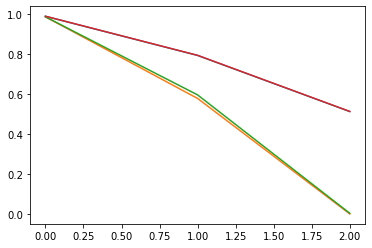

In [63]:
plt.plot(ct_table2.index, ct_table2['ssr F p-value'])
plt.plot(ct_table2.index, ct_table2['ssr chi2 p-value'])
plt.plot(ct_table2.index, ct_table2['likelihoodratio p-value'])
plt.plot(ct_table2.index, ct_table2['param F p-value'])

- Conclusion: The p-values for ssr based chi2 and likelihood tests are both significant at lag=3, indicating that general racial hate crimes Granger-cause Sinophobic Twitter trends at lag 3

## Granger Causality for Monthly Google Search Trend and Anti-Asian Hate Crimes Time Series

In [20]:
gc_res1 = grangercausalitytests(np.column_stack((google_m_old_df, crime_a_diff)), maxlag=3)
gc_table1 = granger_table(gc_res1, 3)
gc_table1


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1374  , p=0.7219  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=0.1962  , p=0.6578  , df=1
likelihood ratio test: chi2=0.1943  , p=0.6593  , df=1
parameter F test:         F=0.1374  , p=0.7219  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1052  , p=0.9025  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=0.4734  , p=0.7892  , df=2
likelihood ratio test: chi2=0.4614  , p=0.7940  , df=2
parameter F test:         F=0.1052  , p=0.9025  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3065  , p=0.8314  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=7.3551  , p=0.0614  , df=3
likelihood ratio test: chi2=5.2160  , p=0.1566  , df=3
parameter F test:         F=0.3065  , p=0.8314  , df_denom=1, df_num=3


/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,


,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.722,0.658,0.659,0.722
1,2.0,0.903,0.789,0.794,0.903
2,3.0,0.831,0.061,0.157,0.831


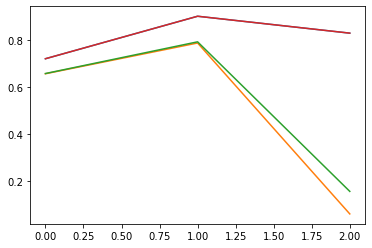

In [64]:
plt.plot(gc_table1.index, gc_table1['ssr F p-value'])
plt.plot(gc_table1.index, gc_table1['ssr chi2 p-value'])
plt.plot(gc_table1.index, gc_table1['likelihoodratio p-value'])
plt.plot(gc_table1.index, gc_table1['param F p-value'])

- Conclusion: From the above p-value table, we don't see Granger Causality between incidents of anti-Asian hate crimes and Google search trends of anti-Chinese words

In [21]:
gc_res2 = grangercausalitytests(np.column_stack((google_m_new_df, crime_a_diff)), maxlag=3)
gc_table2 = granger_table(gc_res2, 3)
gc_table2


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2535  , p=0.2998  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=1.7907  , p=0.1808  , df=1
likelihood ratio test: chi2=1.6473  , p=0.1993  , df=1
parameter F test:         F=1.2535  , p=0.2998  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1123  , p=0.4130  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=5.0051  , p=0.0819  , df=2
likelihood ratio test: chi2=3.9798  , p=0.1367  , df=2
parameter F test:         F=1.1123  , p=0.4130  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.6892  , p=0.2577  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=184.5399, p=0.0000  , df=3
likelihood ratio test: chi2=25.4469 , p=0.0000  , df=3
parameter F test:         F=7.6892  , p=0.2577  , df_denom=1, df_num=3


/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,


,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.3,0.181,0.199,0.3
1,2.0,0.413,0.082,0.137,0.413
2,3.0,0.258,0.0,0.0,0.258


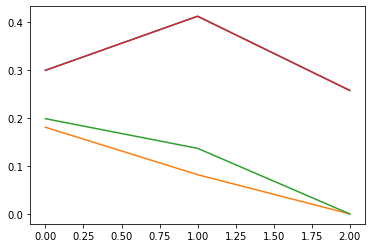

In [65]:
plt.plot(gc_table2.index, gc_table2['ssr F p-value'])
plt.plot(gc_table2.index, gc_table2['ssr chi2 p-value'])
plt.plot(gc_table2.index, gc_table2['likelihoodratio p-value'])
plt.plot(gc_table2.index, gc_table2['param F p-value'])

- Conclusion: At lag=3, ssr based test and likelihood test generate significant p-values, indicating a Granger Causality between Google search trends on the new set of anti-Chinese words and anti-Asian hate crimes

In [22]:
gc_res3 = grangercausalitytests(np.column_stack((google_m_old_df, crime_diff)), maxlag=3)
gc_table3 = granger_table(gc_res3, 3)
gc_table3


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5525  , p=0.1541  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=3.6465  , p=0.0562  , df=1
likelihood ratio test: chi2=3.1090  , p=0.0779  , df=1
parameter F test:         F=2.5525  , p=0.1541  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3790  , p=0.1382  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=15.2056 , p=0.0005  , df=2
likelihood ratio test: chi2=8.9042  , p=0.0117  , df=2
parameter F test:         F=3.3790  , p=0.1382  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1098.6313, p=0.0222  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=26367.1508, p=0.0000  , df=3
likelihood ratio test: chi2=64.8059 , p=0.0000  , df=3
parameter F test:         F=1098.6313, p=0.0222  , df_denom=1, df_num=3


/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,


,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.154,0.056,0.078,0.154
1,2.0,0.138,0.0,0.012,0.138
2,3.0,0.022,0.0,0.0,0.022


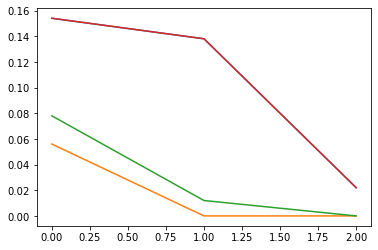

In [66]:
plt.plot(gc_table3.index, gc_table3['ssr F p-value'])
plt.plot(gc_table3.index, gc_table3['ssr chi2 p-value'])
plt.plot(gc_table3.index, gc_table3['likelihoodratio p-value'])
plt.plot(gc_table3.index, gc_table3['param F p-value'])

- Conclusion: So far this is the most significant Granger Causality result. At lag 2 and 3, almost all tests show a significant p-values for the Granger Causality, which means Google search trends based on the old set of search words Granger-cause all racial hate crimes.

In [23]:
gc_res4 = grangercausalitytests(np.column_stack((google_m_new_df, crime_diff)), maxlag=3)
gc_table4 = granger_table(gc_res4, 3)
gc_table4


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.1880  , p=0.0417  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=8.8400  , p=0.0029  , df=1
likelihood ratio test: chi2=6.3340  , p=0.0118  , df=1
parameter F test:         F=6.1880  , p=0.0417  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8669  , p=0.1689  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=12.9009 , p=0.0016  , df=2
likelihood ratio test: chi2=8.0037  , p=0.0183  , df=2
parameter F test:         F=2.8669  , p=0.1689  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5146  , p=0.5240  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=36.3503 , p=0.0000  , df=3
likelihood ratio test: chi2=13.7014 , p=0.0033  , df=3
parameter F test:         F=1.5146  , p=0.5240  , df_denom=1, df_num=3


/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,


,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.042,0.003,0.012,0.042
1,2.0,0.169,0.002,0.018,0.169
2,3.0,0.524,0.0,0.003,0.524


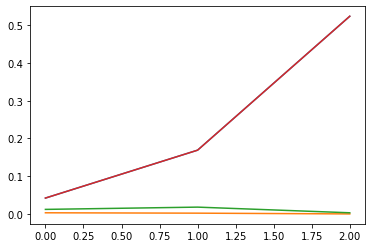

In [67]:
plt.plot(gc_table4.index, gc_table4['ssr F p-value'])
plt.plot(gc_table4.index, gc_table4['ssr chi2 p-value'])
plt.plot(gc_table4.index, gc_table4['likelihoodratio p-value'])
plt.plot(gc_table4.index, gc_table4['param F p-value'])

- Conclusion: In addition to the previous Granger Causality test being significant and salient, the Granger Causality between Google search trends of new set of anti-Chinese words and all racial hate crimes shows significant p values at lag=1,2,3. 

- Overall conclusion: The Google search trends based on the old and new set of anti-Chinese words Granger-cause racial hate crimes at a salient level.

Now let's move to the reverse direction

In [24]:
cg_res1 = grangercausalitytests(np.column_stack((crime_a_diff, google_m_old_df)), maxlag=3)
cg_table1 = granger_table(cg_res1, 3)
cg_table1


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7370  , p=0.4191  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=1.0528  , p=0.3049  , df=1
likelihood ratio test: chi2=1.0010  , p=0.3171  , df=1
parameter F test:         F=0.7370  , p=0.4191  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2


/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,


ssr based F test:         F=0.5181  , p=0.6309  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=2.3313  , p=0.3117  , df=2
likelihood ratio test: chi2=2.0731  , p=0.3547  , df=2
parameter F test:         F=0.5181  , p=0.6309  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1127  , p=0.9413  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=2.7055  , p=0.4393  , df=3
likelihood ratio test: chi2=2.3306  , p=0.5067  , df=3
parameter F test:         F=0.1127  , p=0.9413  , df_denom=1, df_num=3


/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,


,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.419,0.305,0.317,0.419
1,2.0,0.631,0.312,0.355,0.631
2,3.0,0.941,0.439,0.507,0.941


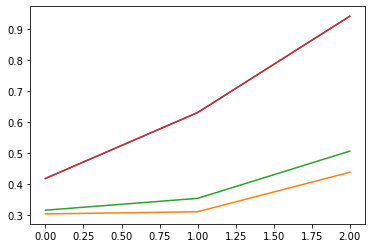

In [68]:
plt.plot(cg_table1.index, cg_table1['ssr F p-value'])
plt.plot(cg_table1.index, cg_table1['ssr chi2 p-value'])
plt.plot(cg_table1.index, cg_table1['likelihoodratio p-value'])
plt.plot(cg_table1.index, cg_table1['param F p-value'])

- Conclusion: We don't see a clear Granger Causality

In [25]:
cg_res2 = grangercausalitytests(np.column_stack((crime_a_diff, google_m_new_df)), maxlag=3)
cg_table2 = granger_table(cg_res2, 3)
cg_table2


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4798  , p=0.5108  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=0.6854  , p=0.4077  , df=1
likelihood ratio test: chi2=0.6629  , p=0.4155  , df=1
parameter F test:         F=0.4798  , p=0.5108  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.7812  , p=0.1197  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=17.0156 , p=0.0002  , df=2
likelihood ratio test: chi2=9.5532  , p=0.0084  , df=2
parameter F test:         F=3.7812  , p=0.1197  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.6886  , p=0.3614  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=88.5271 , p=0.0000  , df=3
likelihood ratio test: chi2=19.9231 , p=0.0002  , df=3
parameter F test:         F=3.6886  , p=0.3614  , df_denom=1, df_num=3


/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,


,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.511,0.408,0.416,0.511
1,2.0,0.12,0.0,0.008,0.12
2,3.0,0.361,0.0,0.0,0.361


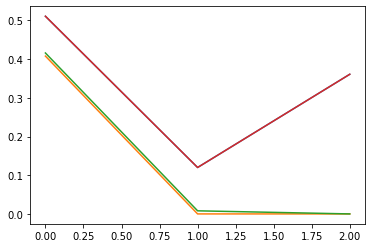

In [69]:
plt.plot(cg_table2.index, cg_table2['ssr F p-value'])
plt.plot(cg_table2.index, cg_table2['ssr chi2 p-value'])
plt.plot(cg_table2.index, cg_table2['likelihoodratio p-value'])
plt.plot(cg_table2.index, cg_table2['param F p-value'])

- Conclusion: At lag 2 and 3, the p-values based on ssr based chi2 and likelihood ratio tests are significant, which means incidents of anti-Asian hate crimes Granger-cause Google search trends based on the new set of anti-Chinese words

In [26]:
cg_res3 = grangercausalitytests(np.column_stack((crime_diff, google_m_old_df)), maxlag=3)
cg_table3 = granger_table(cg_res3, 3)
cg_table3


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4108  , p=0.5420  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=0.5869  , p=0.4436  , df=1
likelihood ratio test: chi2=0.5703  , p=0.4501  , df=1
parameter F test:         F=0.4108  , p=0.5420  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0612  , p=0.9415  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=0.2755  , p=0.8713  , df=2
likelihood ratio test: chi2=0.2713  , p=0.8731  , df=2
parameter F test:         F=0.0612  , p=0.9415  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1259  , p=0.9332  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=3.0210  , p=0.3884  , df=3
likelihood ratio test: chi2=2.5629  , p=0.4640  , df=3
parameter F test:         F=0.1259  , p=0.9332  , df_denom=1, df_num=3


/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,


,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.542,0.444,0.45,0.542
1,2.0,0.941,0.871,0.873,0.941
2,3.0,0.933,0.388,0.464,0.933


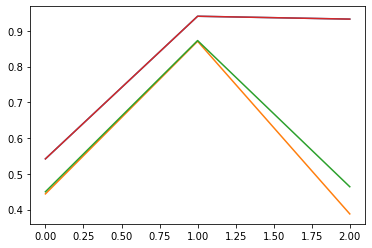

In [70]:
plt.plot(cg_table3.index, cg_table3['ssr F p-value'])
plt.plot(cg_table3.index, cg_table3['ssr chi2 p-value'])
plt.plot(cg_table3.index, cg_table3['likelihoodratio p-value'])
plt.plot(cg_table3.index, cg_table3['param F p-value'])

- Conclusion: We don't see Granger Causality between all racial hate crimes and Google search trends based on old set of anti-Chinese search terms

In [27]:
cg_res4 = grangercausalitytests(np.column_stack((crime_diff, google_m_new_df)), maxlag=3)
cg_table4 = granger_table(cg_res4, 3)
cg_table4


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0696  , p=0.3354  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=1.5280  , p=0.2164  , df=1
likelihood ratio test: chi2=1.4220  , p=0.2331  , df=1
parameter F test:         F=1.0696  , p=0.3354  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7679  , p=0.2818  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=7.9554  , p=0.0187  , df=2
likelihood ratio test: chi2=5.7003  , p=0.0578  , df=2
parameter F test:         F=1.7679  , p=0.2818  , df_denom=4, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=23.7816 , p=0.1493  , df_denom=1, df_num=3
ssr based chi2 test:   chi2=570.7585, p=0.0000  , df=3
likelihood ratio test: chi2=34.2515 , p=0.0000  , df=3
parameter F test:         F=23.7816 , p=0.1493  , df_denom=1, df_num=3


/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_3792/2581546275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,


,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.335,0.216,0.233,0.335
1,2.0,0.282,0.019,0.058,0.282
2,3.0,0.149,0.0,0.0,0.149


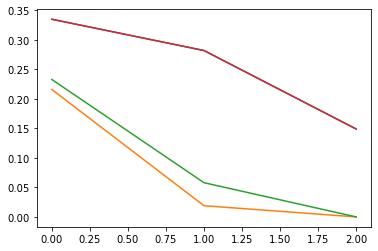

In [71]:
plt.plot(cg_table4.index, cg_table4['ssr F p-value'])
plt.plot(cg_table4.index, cg_table4['ssr chi2 p-value'])
plt.plot(cg_table4.index, cg_table4['likelihoodratio p-value'])
plt.plot(cg_table4.index, cg_table4['param F p-value'])

- Conclusion: We see significant p-values on ssr based chi2 test and likelihood ratio test at lag=2 and lag=3, indicating that incidents of all racial hate crimes Granger-cause Google search on the new set of anti-Chinese terms

In [39]:
example = pd.concat([tgm_table1, tgm_table2, gtm_table1, gtm_table2, 
                              tc_table1, tc_table2, ct_table1, ct_table2, gc_table1, 
                              gc_table2, gc_table3, gc_table4, cg_table1, cg_table2, 
                              cg_table3, cg_table4])
example

,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,1.0,0.147,0.052,0.073,0.147
1,2.0,0.712,0.434,0.465,0.712
2,3.0,0.583,0.0,0.008,0.583
0,1.0,0.307,0.188,0.206,0.307
1,2.0,0.43,0.094,0.15,0.43
2,3.0,0.289,0.0,0.0,0.289
0,1.0,0.938,0.923,0.923,0.938
1,2.0,0.851,0.686,0.696,0.851
2,3.0,0.823,0.051,0.143,0.823
0,1.0,0.646,0.566,0.569,0.646


In [45]:
row1 = ['twitter, google search on old words'] + ['']*4
row1 = pd.DataFrame([row1], columns=['Maxlags', 'ssr F p-value', 'ssr chi2 p-value', 'likelihoodratio p-value', 'param F p-value'])

row2 = ['twitter, google search on new words'] + ['']*4
row2 = pd.DataFrame([row2], columns=['Maxlags', 'ssr F p-value', 'ssr chi2 p-value', 'likelihoodratio p-value', 'param F p-value'])

row3 = ['google search on old words, twitter'] + ['']*4
row3 = pd.DataFrame([row3], columns=['Maxlags', 'ssr F p-value', 'ssr chi2 p-value', 'likelihoodratio p-value', 'param F p-value'])

row4 = ['google search on new words, twitter'] + ['']*4
row4 = pd.DataFrame([row4], columns=['Maxlags', 'ssr F p-value', 'ssr chi2 p-value', 'likelihoodratio p-value', 'param F p-value'])

row5 = ['twitter, anti-Asian crimes'] + ['']*4
row5 = pd.DataFrame([row5], columns=['Maxlags', 'ssr F p-value', 'ssr chi2 p-value', 'likelihoodratio p-value', 'param F p-value'])

row6 = ['twitter, all-racial crimes'] + ['']*4
row6 = pd.DataFrame([row6], columns=['Maxlags', 'ssr F p-value', 'ssr chi2 p-value', 'likelihoodratio p-value', 'param F p-value'])

row7 = ['anti-Asian crimes, twitter'] + ['']*4
row7 = pd.DataFrame([row7], columns=['Maxlags', 'ssr F p-value', 'ssr chi2 p-value', 'likelihoodratio p-value', 'param F p-value'])

row8 = ['all-racial crimes, twitter'] + ['']*4
row8 = pd.DataFrame([row8], columns=['Maxlags', 'ssr F p-value', 'ssr chi2 p-value', 'likelihoodratio p-value', 'param F p-value'])

row9 = ['google search on old words, anti-Asian crimes'] + ['']*4
row9 = pd.DataFrame([row9], columns=['Maxlags', 'ssr F p-value', 'ssr chi2 p-value', 'likelihoodratio p-value', 'param F p-value'])

row10 = ['google search on new words, anti-Asian crimes'] + ['']*4
row10 = pd.DataFrame([row10], columns=['Maxlags', 'ssr F p-value', 'ssr chi2 p-value', 'likelihoodratio p-value', 'param F p-value'])

row11 = ['google search on old words, all-racial crimes'] + ['']*4
row11 = pd.DataFrame([row11], columns=['Maxlags', 'ssr F p-value', 'ssr chi2 p-value', 'likelihoodratio p-value', 'param F p-value'])

row12 = ['google search on new words, all-racial crimes'] + ['']*4
row12 = pd.DataFrame([row12], columns=['Maxlags', 'ssr F p-value', 'ssr chi2 p-value', 'likelihoodratio p-value', 'param F p-value'])

row13 = ['google search on old words, anti-Asian crimes'] + ['']*4
row13 = pd.DataFrame([row13], columns=['Maxlags', 'ssr F p-value', 'ssr chi2 p-value', 'likelihoodratio p-value', 'param F p-value'])

row14 = ['google search on new words, anti-Asian crimes'] + ['']*4
row14 = pd.DataFrame([row14], columns=['Maxlags', 'ssr F p-value', 'ssr chi2 p-value', 'likelihoodratio p-value', 'param F p-value'])

row15 = ['google search on old words, all-racial crimes'] + ['']*4
row15 = pd.DataFrame([row15], columns=['Maxlags', 'ssr F p-value', 'ssr chi2 p-value', 'likelihoodratio p-value', 'param F p-value'])

row16 = ['google search on new words, all-racial crimes'] + ['']*4
row16 = pd.DataFrame([row16], columns=['Maxlags', 'ssr F p-value', 'ssr chi2 p-value', 'likelihoodratio p-value', 'param F p-value'])


In [44]:
df_row1 = pd.DataFrame([row1], columns=['Maxlags', 'ssr F p-value', 'ssr chi2 p-value', 'likelihoodratio p-value', 'param F p-value'])
exa = pd.concat([df_row1, tgm_table1, tgm_table1])
exa

,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,"twitter, google search on old words",,,,
0,1.0,0.147,0.052,0.073,0.147
1,2.0,0.712,0.434,0.465,0.712
2,3.0,0.583,0.0,0.008,0.583
0,1.0,0.147,0.052,0.073,0.147
1,2.0,0.712,0.434,0.465,0.712
2,3.0,0.583,0.0,0.008,0.583


In [49]:
monthly_p_values = pd.concat([row1, tgm_table1, row2, tgm_table2, row3, gtm_table1, row4, gtm_table2, 
                              row5, tc_table1, row6, tc_table2, row7, ct_table1, row8, ct_table2, row9, gc_table1, 
                              row10, gc_table2, row11, gc_table3, row12, gc_table4, row13, cg_table1, row14, cg_table2, 
                              row15, cg_table3, row16, cg_table4])

monthly_p_values = monthly_p_values.reset_index(drop=True)
monthly_p_values

,Maxlags,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
0,"twitter, google search on old words",,,,
1,1.0,0.147,0.052,0.073,0.147
2,2.0,0.712,0.434,0.465,0.712
3,3.0,0.583,0.0,0.008,0.583
4,"twitter, google search on new words",,,,
...,...,...,...,...,...
59,3.0,0.933,0.388,0.464,0.933
60,"google search on new words, all-racial crimes",,,,
61,1.0,0.335,0.216,0.233,0.335
62,2.0,0.282,0.019,0.058,0.282


In [50]:
monthly_p_values.to_csv('Granger_Monthly_Results.csv')